# S07 T01: Tasca dades, probabilitats i estadístiques

__Enunciats:__  

- Exercici 1  
Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula la moda, la mediana, la desviació estàndard i la mitjana aritmètica.

- Exercici 2  
Continuant amb les dades de tema esportiu, selecciona dos atributs i calcula'n la seva correlació.  

- Exercici 3
Continuant amb les dades de tema esportiu, calcula la correlació de tots els atributs entre sí i representa'ls en una matriu amb diferents colors d'intensitat.  
- Exercici 4
Continuant amb les dades de tema esportiu, selecciona un atribut i calcula la mitjana geomètrica i la mitjana harmònica.

Tal com vaig fer en la tasca anterior, he pres el data set 'Teams' que pertany a la base de dades [Professional Hockey Database](https://www.kaggle.com/open-source-sports/professional-hockey-database) de Kaggle. 
Aquest cop he afegit la descripció de les variables incloses per tal de tenir una idea més clara del que contenen.

•	year: Year (2005-06 listed as "2005")  

•	lgID: League ID  

•	tmID: Team ID  

•	franchID: Franchise ID  

•	confID: Conference ID (see abbrev.csv for details)  

•	divID: Division ID (see abbrev.csv for details)  

•	rank: Final standing  

•	playoff: Playoff result (see abbrev.csv for details)  

•	G: Games  

•	W: Wins  

•	L: Losses  

•	T: Ties  

•	OTL: Overtime losses  

•	Pts: Points  

•	SoW: Shootout wins  

•	SoL: Shootout losses  

•	GF: Goals for  

•	GA: Goals against  

•	name: Full team name  

•	PIM: Penalty minutes  

•	BenchMinor: Bench minors (minutes)  

•	PPG: Power play goals  

•	PPC: Power play chances  

•	SHA: Shorthanded goals against  

•	PKG: Power play goals against  

•	PKC: Penalty kill chances  

•	SHF: Shorthanded goals for


__Importo les dades:__

In [1]:
import pandas as pd 
hockey = pd.read_csv('dades/Teams.csv')
hockey.head()

,year,lgID,tmID,franchID,confID,divID,rank,playoff,G,W,...,GA,name,PIM,BenchMinor,PPG,PPC,SHA,PKG,PKC,SHF
0,1909,NHA,COB,BKN,NaN,NaN,4,NaN,12,4,...,104,Cobalt Silver Kings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1909,NHA,HAI,MTL,NaN,NaN,5,NaN,12,4,...,83,Haileybury Hockey Club,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1909,NHA,LES,TBS,NaN,NaN,7,NaN,12,2,...,100,Les Canadiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1909,NHA,MOS,MOS,NaN,NaN,6,NaN,12,3,...,95,Montreal Shamrocks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1909,NHA,MOW,MTW,NaN,NaN,1,NaN,12,11,...,41,Montreal Wanderers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Substitueixo els valors NaN per 0, i faig que la vairable Playoff contingui només valors numèrics, 0 pels equips que no han guanyat el Playoff i 1 pels que ho han fet.

In [2]:
hockey= hockey.fillna(0)
import re

hockey['playoff'] = hockey.playoff.replace(regex='\D', value=1)
hockey.playoff.unique()

array([0, 1], dtype=int64)

He triat la variable G, partits jugats, i procedeixo a extreure'n els valors demanats:

In [3]:
print('La moda es:')
hockey.G.mode()

La moda es:


0    82
dtype: int64

In [4]:
print('La mediana es:')
hockey.G.median()

La mediana es:


80.0

In [5]:
print('La desviació Standard:')
hockey.G.std()

La desviació Standard:


19.69984337028971

In [6]:
print(' i la mitjana aritmètica:')
hockey.G.mean()

 i la mitjana aritmètica:


69.51810401579986

Aquest cop ho he fet pas a pas, tot i que podem obtenir les dades tot d'una amb la funció __.drescribe()__

In [7]:

hockey.G.describe().round(2)

count    1519.00
mean       69.52
std        19.70
min         1.00
25%        70.00
50%        80.00
75%        82.00
max        84.00
Name: G, dtype: float64

Ara passo a calcular la correlació entre els partits guanyats i els gols marcats.

In [8]:
hockey.W.corr(hockey.GF).round(3)

0.783

i entre els partits guanyats i gols rebuts.

In [9]:
hockey.W.corr(hockey.GA).round(3)

0.365

Com es demana a l'apartat 3,  calcul.lo la correlació de tots els atributs entre sí i en faig un HeatMap.

In [10]:
corr = hockey.corr()

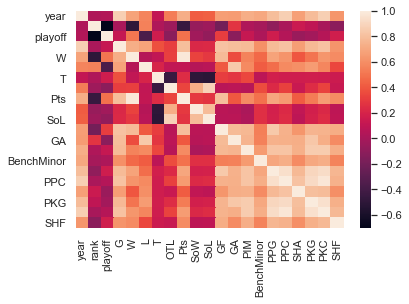

In [11]:

import seaborn as sns; sns.set_theme()

ax = sns.heatmap(corr)

Per últim, he triat els partits jugats per obtenir la mitjana geomètrica i la mitjana harmònica.

In [12]:
from scipy.stats import gmean
gmean(hockey.G.unique()).round(3)


28.672

In [13]:
from scipy.stats import hmean
hmean(hockey.G.unique()).round(3)

14.148

Bel Ortega
Juny 2021